In [38]:
import torch
from torch import nn

In [39]:
import sys
sys.path.append('/gpfs01/bethge/home/sschneider/thesis/code/domainadaptation/')

from train import get_data

from salad.utils import panelize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [40]:
import glob

def get_model(domain = 0):
    files = list(glob.glob('log-{}/*/*checkpoint*ep9.pth'.format(domain)))
    model = torch.load(files[-1])
    print(files)
    return model
    
def evaluate(model, data):
    Y = []
    P = []

    for x,y,d in data:
        with torch.no_grad():
            p = model(x.cuda())[1].cpu()
        P.append(p)
        Y.append(y)
    
    Y = torch.cat(Y, dim=0)
    P = torch.cat(P, dim=0)

    cfm = confusion_matrix(Y.numpy(), P.numpy().argmax(axis=-1))
    
    return cfm
    
cfms = {}
for domain in range(6):    

    model = get_model(domain)
    model.eval()
    data  = get_data(train=False, test_angle=domain)
    cfm   = evaluate(model, data)

    cfms[domain] = cfm

['log-0/20180911-180210_CrossGradSolver/20180911-180210-checkpoint-ep9.pth']
testing on 0
testing on 0
['log-1/20180911-182705_CrossGradSolver/20180911-182705-checkpoint-ep9.pth']
testing on 15
testing on 15
['log-2/20180911-185208_CrossGradSolver/20180911-185208-checkpoint-ep9.pth']
testing on 30
testing on 30
['log-3/20180911-191702_CrossGradSolver/20180911-191702-checkpoint-ep9.pth']
testing on 45
testing on 45
['log-4/20180911-194200_CrossGradSolver/20180911-194200-checkpoint-ep9.pth']
testing on 60
testing on 60
['log-5/20180911-200655_CrossGradSolver/20180911-200655-checkpoint-ep9.pth']
testing on 75
testing on 75


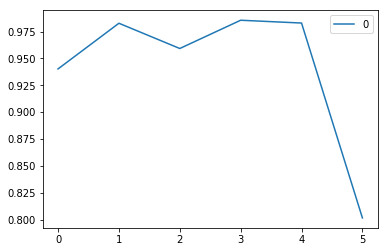

In [41]:
import pandas as pd
import numpy as np

def get_scores(cfm):
    
    tp = np.diag(cfm)
    fp = cfm.sum(axis=0) - tp
    fn = cfm.sum(axis=1) - tp
    
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    acc = tp.sum() / (cfm.sum())
    
    return acc

accs = pd.DataFrame([get_scores(cfms[i]) for i in range(6)])

accs.plot()

testing on 75
testing on 75
tensor([ 7,  7,  8,  1,  6,  4,  1,  6,  3,  0,  5,  2,  9,  9,
         2,  7,  4,  5,  0,  5,  2,  0,  8,  3,  6,  7,  6,  1,
         2,  1,  4,  1,  0,  1,  1,  5,  1,  8,  9,  8,  9,  0,
         3,  6,  8,  8,  5,  1,  1,  6,  6,  0,  4,  5,  7,  9,
         2,  4,  8,  0,  2,  5,  3,  3])


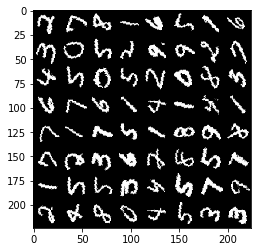

torch.Size([64, 1, 28, 28]) torch.Size([64]) torch.Size([64])


In [48]:
from salad.utils import panelize
import matplotlib.pyplot as plt
%matplotlib inline

for x,y,d in get_data(train=False, test_angle=5):
    
    with torch.no_grad():
        p = model(x.cuda())[1].cpu()
        
    print(p.max(dim=1)[1])
    
    plt.imshow(panelize(x.numpy()).squeeze(), cmap='gray')
    plt.show()
    
    print(x.size(), y.size(), d.size())
    break